In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('Electricity.csv')

display(df.head())

df.info()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [16]:
print(df.isnull().sum())

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64


In [17]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['hour'] = df['DateTime'].dt.hour
df['dayofweek'] = df['DateTime'].dt.dayofweek
df['month'] = df['DateTime'].dt.month

print("--- Naye columns (hour, dayofweek, month) add ho gaye hain ---")
df.head()

--- Naye columns (hour, dayofweek, month) add ho gaye hain ---


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,hour,dayofweek,month
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,0,1,1
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,1,1,1
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,2,1,1
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,3,1,1
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,4,1,1


In [18]:
features = ['hour', 'dayofweek', 'month', 'Production'] 
X = df[features]
y = df['Consumption']

print("Features selected for Training:", features)

Features selected for Training: ['hour', 'dayofweek', 'month', 'Production']


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model Training Complete!")

Model Training Complete!


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

print(f"Accuracy (R2 Score): {r2_score(y_test, y_pred)*100:.2f}%")
print(f"Average Error: {mean_absolute_error(y_test, y_pred):.2f} units")

Accuracy (R2 Score): 78.96%
Average Error: 364.77 units


In [21]:
features = ['hour', 'dayofweek', 'month', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
X = df[features]
y = df['Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"New Accuracy: {r2_score(y_test, y_pred)*100:.2f}%")

New Accuracy: 95.71%


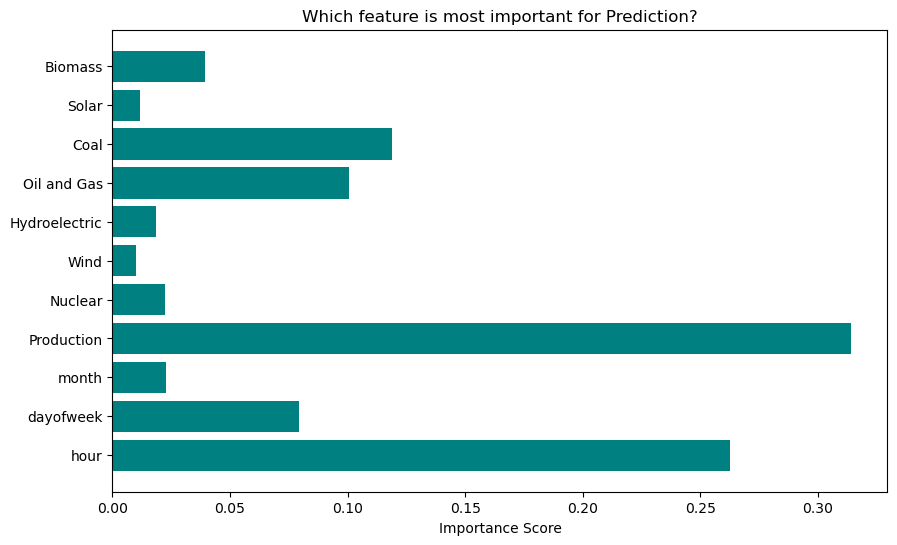

In [22]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances, color='teal')
plt.xlabel('Importance Score')
plt.title('Which feature is most important for Prediction?')
plt.show()

In [23]:
import pickle

with open('energy_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("The model is saved! You can now load it into any new file.")

The model is saved! You can now load it into any new file.


In [25]:
print("Testing ke liye values yahan se lein:")
display(X_test.head(1))

print("Iska asli jawab tha:")
display(y_test.head(1))

Testing ke liye values yahan se lein:


,hour,dayofweek,month,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
15854,14,3,10,6170,1384,515,2016,554,967,659,74


Iska asli jawab tha:


15854    7009
Name: Consumption, dtype: int64

In [34]:
test_row = [[14, 3, 10, 6170, 1384, 515, 201, 655, 496, 76, 5974]]
current_df = pd.DataFrame(test_row, columns=X.columns)

predicted_value = model.predict(current_df)

print(f"Model ki Prediction: {predicted_value[0]:.2f}")
print(f"Asli Value: 7009")
print(f"Difference: {abs(7009 - predicted_value[0]):.2f}")

Model ki Prediction: 6571.00
Asli Value: 7009
Difference: 438.00


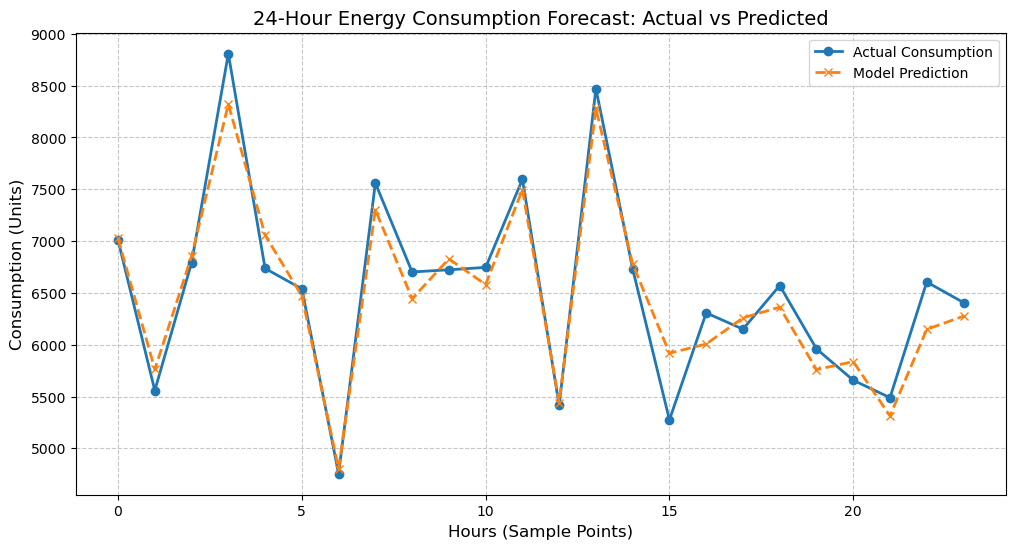

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

sample_X = X_test.head(24)
sample_y = y_test.head(24)

predictions_24h = model.predict(sample_X)

plt.figure(figsize=(12, 6))

plt.plot(range(24), sample_y.values, label='Actual Consumption', 
         color='#1f77b4', marker='o', linewidth=2)

plt.plot(range(24), predictions_24h, label='Model Prediction', 
         color='#ff7f0e', linestyle='--', marker='x', linewidth=2)

plt.title('24-Hour Energy Consumption Forecast: Actual vs Predicted', fontsize=14)
plt.xlabel('Hours (Sample Points)', fontsize=12)
plt.ylabel('Consumption (Units)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [31]:
import pandas as pd

sample_date = pd.to_datetime('2024-03-31 23:00:00')

print(f"Hour: {sample_date.hour}")         
print(f"Month: {sample_date.month}")       
print(f"Day of Week: {sample_date.dayofweek}") 

Hour: 23
Month: 3
Day of Week: 6


In [36]:
test_row = [[23, 3, 6, 5551, 1391, 1011, 1845, 633, 607, 0, 66]]
current_df = pd.DataFrame(test_row, columns=X.columns)

predicted_value = model.predict(current_df)

print(f"Model ki Prediction: {predicted_value[0]:.2f}")


Model ki Prediction: 5984.60


In [35]:
import pickle

with open('energy_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("The model is saved! You can now load it into any new file.")

The model is saved! You can now load it into any new file.
